In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab Notebooks/data'

info_tourism = pd.read_csv(f"{path}/tourism_with_id.csv")
tourism_rating = pd.read_csv(f"{path}/tourism_rating.csv")
users = pd.read_csv(f"{path}/user.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing


## Info Tourism


In [3]:
info_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [4]:
info_tourism.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [5]:
info_tourism.columns

Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price',
       'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

In [6]:
# Menghilangkan unnamed column
info_tourism = info_tourism.drop(['Unnamed: 11', 'Unnamed: 12'], axis=1)
info_tourism.columns

Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price',
       'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long'],
      dtype='object')

In [7]:
# # Asumsi daerah wisata yang ramah lingkungan adalah bahari, cagar alam, dan budaya
info_tourism = info_tourism.loc[info_tourism['Category'].isin(['Bahari', 'Cagar Alam', 'Budaya'])]
info_tourism['Category'].unique()

array(['Budaya', 'Cagar Alam', 'Bahari'], dtype=object)

In [8]:
info_tourism.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      270 non-null    int64  
 1   Place_Name    270 non-null    object 
 2   Description   270 non-null    object 
 3   Category      270 non-null    object 
 4   City          270 non-null    object 
 5   Price         270 non-null    int64  
 6   Rating        270 non-null    float64
 7   Time_Minutes  123 non-null    float64
 8   Coordinate    270 non-null    object 
 9   Lat           270 non-null    float64
 10  Long          270 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 25.3+ KB


In [9]:
info_tourism.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
6,7,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Cagar Alam,Jakarta,4000,4.5,NaN,"{'lat': -6.3124593, 'lng': 106.8201865}",-6.312459,106.820187
8,9,Pelabuhan Marina,Pelabuhan Marina Ancol berada di kawasan Taman...,Bahari,Jakarta,175000,4.4,NaN,"{'lat': 1.07888, 'lng': 103.931398}",1.078880,103.931398
9,10,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Bahari,Jakarta,150000,4.5,NaN,"{'lat': -5.803205300000001, 'lng': 106.5237907}",-5.803205,106.523791


In [10]:
info_tourism.columns

Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price',
       'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long'],
      dtype='object')

In [11]:
#filter data agar data dari info tourism kategori bahari, cagar alam dan budaya saja yang dipertahankan dalam tabel tourism rating dan users 

tourism_rating = tourism_rating.loc[tourism_rating['Place_Id'].isin(info_tourism['Place_Id'])]
users = users.loc[users['User_Id'].isin(tourism_rating['User_Id'])]

### Missing Value

In [12]:
def check_missing_value(df):
  col_na = df.isnull().sum().sort_values(ascending=False)
  percent = col_na/len(df)

  missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
  print(missing_data[missing_data['Total']>0])

In [13]:
check_missing_value(info_tourism)

              Total   Percent
Time_Minutes    147  0.544444


In [14]:
# Menghilangkan kolom time_minutes
info_tourism = info_tourism.drop(['Time_Minutes'], axis=1)
info_tourism.columns

Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price',
       'Rating', 'Coordinate', 'Lat', 'Long'],
      dtype='object')

In [15]:
check_missing_value(info_tourism)

Empty DataFrame
Columns: [Total, Percent]
Index: []


### Duplicate Value

In [16]:
info_tourism.duplicated().sum()

0

## Tourism Rating

In [17]:
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6177 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        6177 non-null   int64
 1   Place_Id       6177 non-null   int64
 2   Place_Ratings  6177 non-null   int64
dtypes: int64(3)
memory usage: 193.0 KB


In [18]:
tourism_rating.head(5)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
3,1,373,3
4,1,101,4
5,1,312,2


### Missing Value

In [19]:
check_missing_value(tourism_rating)

Empty DataFrame
Columns: [Total, Percent]
Index: []


### Duplicate Value

In [20]:
tourism_rating.duplicated(['User_Id', 'Place_Id']).sum()

251

In [21]:
tourism_rating.drop_duplicates(['User_Id', 'Place_Id'], keep='last', inplace=True, ignore_index=True)
tourism_rating.duplicated().sum()

0

## Users

In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 9.4+ KB


In [23]:
users.head(5)

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


### Missing Value


In [24]:
check_missing_value(users)

Empty DataFrame
Columns: [Total, Percent]
Index: []


### Duplicate Value

In [25]:
users.duplicated().sum()

0

# Collaborative Modelling (tidak digunakan)

In [ ]:
import tensorflow as tf
from tensorflow import keras

## Membuat matrix R dan Y

In [ ]:
jumlah_wisata = len(info_tourism)
jumlah_user = len(users)
R = np.zeros((jumlah_wisata, jumlah_user))
Y = np.zeros((jumlah_wisata, jumlah_user))

In [ ]:
for i in range(1, jumlah_wisata + 1):
  for j in range(1, jumlah_user + 1):
    temp = tourism_rating.loc[(tourism_rating['Place_Id'] == i) & (tourism_rating['User_Id'] == j)]
    if not temp.empty:
      R[i-1, j-1] = 1
      Y[i-1, j-1] = temp['Place_Ratings']

KeyboardInterrupt: ignored

In [ ]:
R

In [ ]:
Y

## Learning Wisata

In [ ]:
my_ratings = np.zeros(jumlah_wisata)

my_ratings[0] = 5 # Monumen Nasional
my_ratings[64] = 4 # Museum Basoeki Abdullah
my_ratings[67] = 1 # Pasar Petak Sembilan
my_ratings[82] = 1 # Alive Museum Ancol
my_ratings[88] = 5 # De Mata Museum Jogja
my_rated = [i for i in range(len(my_ratings)) if my_ratings[i] > 0]

print('\nNew user ratings:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0 :
        print(f'Rated {my_ratings[i]} for  {info_tourism.loc[i,"Place_Name"]} dengan kategori {info_tourism.loc[i, "Category"]}');

In [ ]:
Y = np.c_[my_ratings, Y]
R = np.c_[(my_ratings != 0).astype(float), R]

In [ ]:
def cofi_cost_func_v(X, W, b, Y, R, lambda_):
    j = (tf.linalg.matmul(X, tf.transpose(W)) + b - Y)*R
    J = 0.5 * tf.reduce_sum(j**2) + (lambda_/2) * (tf.reduce_sum(X**2) + tf.reduce_sum(W**2))
    return J

In [ ]:
#  Useful Values
jumlah_wisata, jumlah_user = Y.shape
jumlah_fitur = 100

# Set Initial Parameters (W, X), use tf.Variable to track these variables
tf.random.set_seed(1234) # for consistent results
W = tf.Variable(tf.random.normal((jumlah_user,  jumlah_fitur),dtype=tf.float64),  name='W')
X = tf.Variable(tf.random.normal((jumlah_wisata, jumlah_fitur),dtype=tf.float64),  name='X')
b = tf.Variable(tf.random.normal((1, jumlah_user),   dtype=tf.float64),  name='b')

# Instantiate an optimizer.
optimizer = keras.optimizers.Adam(learning_rate=1e-1)

In [ ]:
iterations = 1000
lambda_ = 1
for iter in range(iterations):
    # Use TensorFlow’s GradientTape
    # to record the operations used to compute the cost 
    with tf.GradientTape() as tape:

        # Compute the cost (forward pass included in cost)
        cost_value = cofi_cost_func_v(X, W, b, Y, R, lambda_)

    # Use the gradient tape to automatically retrieve
    # the gradients of the trainable variables with respect to the loss
    grads = tape.gradient( cost_value, [X,W,b] )

    # Run one step of gradient descent by updating
    # the value of the variables to minimize the loss.
    optimizer.apply_gradients( zip(grads, [X,W,b]) )

    # Log periodically.
    if iter % 20 == 0:
        print(f"Training loss at iteration {iter}: {cost_value:0.1f}")

In [ ]:
# Make a prediction using trained weights and biases
p = np.matmul(X.numpy(), np.transpose(W.numpy())) + b.numpy()

#restore the mean
pm = p

my_predictions = pm[:,0]

# sort predictions
ix = tf.argsort(my_predictions, direction='DESCENDING')

for i in range(20):
    j = ix[i]
    if j not in my_rated:
        print(f'Predicting rating {my_predictions[j]:0.2f} for wisata {info_tourism.loc[j.numpy(), "Place_Name"]} dengan kategori {info_tourism.loc[j.numpy(), "Category"]}')

print('\n\nOriginal vs Predicted ratings:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print(f'Original {my_ratings[i]}, Predicted {my_predictions[i]:0.2f} for {info_tourism.loc[i, "Place_Name"]} dengan kategori {info_tourism.loc[i, "Category"]}')

# Content Based Modelling

In [96]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import joblib

## Membuat dataset users

In [97]:
users_dataset = users.drop(['Location', 'Age'], axis=1)
users_dataset['avg_budaya'] = 0
users_dataset['avg_cagar_alam'] = 0
users_dataset['avg_bahari'] = 0

users_dataset

,User_Id,avg_budaya,avg_cagar_alam,avg_bahari
0,1,0,0,0
1,2,0,0,0
2,3,0,0,0
3,4,0,0,0
4,5,0,0,0
...,...,...,...,...
295,296,0,0,0
296,297,0,0,0
297,298,0,0,0
298,299,0,0,0


In [98]:
def get_avg_rating_on_category():
  df_cat = info_tourism[['Place_Id', 'Category']].reset_index(drop=True)
  df_users_cat = tourism_rating.merge(df_cat)
  avg = df_users_cat.groupby(["User_Id", "Category"])['Place_Ratings'].mean().reset_index()
  return avg

avg_dataset = get_avg_rating_on_category()
avg_dataset

,User_Id,Category,Place_Ratings
0,1,Bahari,2.000000
1,1,Budaya,3.500000
2,1,Cagar Alam,3.625000
3,2,Bahari,2.000000
4,2,Budaya,3.444444
...,...,...,...
885,299,Budaya,3.250000
886,299,Cagar Alam,2.250000
887,300,Bahari,3.000000
888,300,Budaya,3.500000


In [99]:
for index, row in avg_dataset.iterrows():
  if row['Category'] == 'Budaya':
    users_dataset.at[row['User_Id']-1, 'avg_budaya'] = row['Place_Ratings']
  elif row['Category'] == 'Cagar Alam':
    users_dataset.at[row['User_Id']-1, 'avg_cagar_alam'] = row['Place_Ratings']
  elif row['Category'] == 'Bahari':
    users_dataset.at[row['User_Id']-1, 'avg_bahari'] = row['Place_Ratings']

users_dataset

,User_Id,avg_budaya,avg_cagar_alam,avg_bahari
0,1,3.500000,3.625000,2.000000
1,2,3.444444,2.555556,2.000000
2,3,3.230769,4.000000,4.000000
3,4,3.083333,3.750000,5.000000
4,5,3.285714,3.000000,3.500000
...,...,...,...,...
295,296,3.000000,2.800000,3.000000
296,297,2.818182,3.142857,3.333333
297,298,3.833333,3.428571,2.750000
298,299,3.250000,2.250000,2.000000


In [100]:
users_dataset = users_dataset.merge(tourism_rating)
users_dataset = users_dataset.sort_values(['User_Id', 'Place_Id'])
users_dataset

,User_Id,avg_budaya,avg_cagar_alam,avg_bahari,Place_Id,Place_Ratings
6,1,3.5,3.625,2.0,20,4
18,1,3.5,3.625,2.0,21,2
11,1,3.5,3.625,2.0,41,5
20,1,3.5,3.625,2.0,48,2
12,1,3.5,3.625,2.0,67,4
...,...,...,...,...,...,...
5918,300,3.5,2.800,3.0,323,1
5917,300,3.5,2.800,3.0,324,3
5913,300,3.5,2.800,3.0,343,4
5921,300,3.5,2.800,3.0,363,1


## Membuat dataset target

In [101]:
y_train = users_dataset['Place_Ratings'].to_numpy()
y_train

array([4, 2, 5, ..., 4, 1, 4])

In [102]:
print(len(y_train))

5926


## Membuat dataset wisata

In [103]:
tourism_dataset = info_tourism.drop(['Place_Name', 'Description', 'Coordinate'], axis=1)
# tourism_dataset = info_tourism.drop(['Place_Name', 'Description', 'Coordinate', 'City', 'Lat', 'Long'], axis=1)
tourism_dataset

,Place_Id,Category,City,Price,Rating,Lat,Long
0,1,Budaya,Jakarta,20000,4.6,-6.175392,106.827153
1,2,Budaya,Jakarta,0,4.6,-6.137645,106.817125
6,7,Cagar Alam,Jakarta,4000,4.5,-6.312459,106.820187
8,9,Bahari,Jakarta,175000,4.4,1.078880,103.931398
9,10,Bahari,Jakarta,150000,4.5,-5.803205,106.523791
...,...,...,...,...,...,...,...
425,426,Budaya,Surabaya,0,4.7,-7.259295,112.747051
426,427,Budaya,Surabaya,0,4.3,-7.247284,112.801081
427,428,Budaya,Surabaya,0,4.6,-7.267775,112.744390
428,429,Budaya,Surabaya,0,4.6,-7.230817,112.734234


In [104]:
# tourism_dataset = pd.get_dummies(tourism_dataset)
# tourism_dataset['Category'] = tourism_dataset['Category'].astype('category')
tourism_dataset['City'] = tourism_dataset['City'].astype('category')
tourism_dataset['City'] = tourism_dataset['City'].cat.codes

In [105]:
category_encoding = {'Budaya': 1, 'Cagar Alam': 2, 'Bahari': 3}
tourism_dataset['Category'] = tourism_dataset['Category'].map(category_encoding)

In [106]:
tourism_dataset = tourism_dataset.merge(tourism_rating)
tourism_dataset = tourism_dataset.sort_values(['User_Id', 'Place_Id'])
tourism_dataset

,Place_Id,Category,City,Price,Rating,Lat,Long,User_Id,Place_Ratings
243,20,1,1,2000,4.5,-6.172224,106.818969,1,4
262,21,1,1,5000,4.5,-6.134907,106.812445,1,2
408,41,1,1,2000,4.4,-6.126955,106.808590,1,5
499,48,1,1,5000,4.6,-6.189159,106.839774,1,2
780,67,2,1,25000,4.2,-6.116008,106.769202,1,4
...,...,...,...,...,...,...,...,...,...
4347,323,2,0,0,4.9,-6.601321,106.632734,300,1
4369,324,2,0,15000,4.2,-7.114788,107.438086,300,3
4653,343,3,2,3000,4.0,-6.945105,110.398240,300,4
4936,363,3,2,5000,3.4,-6.954569,110.360095,300,1


## Membuat correlation heatmap

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
correlation_dataset = tourism_dataset.merge(users_dataset)
correlation_dataset

,Place_Id,Category,City,Price,Rating,Lat,Long,User_Id,Place_Ratings,avg_budaya,avg_cagar_alam,avg_bahari
0,20,1,1,2000,4.5,-6.172224,106.818969,1,4,3.5,3.625,2.0
1,21,1,1,5000,4.5,-6.134907,106.812445,1,2,3.5,3.625,2.0
2,41,1,1,2000,4.4,-6.126955,106.808590,1,5,3.5,3.625,2.0
3,48,1,1,5000,4.6,-6.189159,106.839774,1,2,3.5,3.625,2.0
4,67,2,1,25000,4.2,-6.116008,106.769202,1,4,3.5,3.625,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5921,323,2,0,0,4.9,-6.601321,106.632734,300,1,3.5,2.800,3.0
5922,324,2,0,15000,4.2,-7.114788,107.438086,300,3,3.5,2.800,3.0
5923,343,3,2,3000,4.0,-6.945105,110.398240,300,4,3.5,2.800,3.0
5924,363,3,2,5000,3.4,-6.954569,110.360095,300,1,3.5,2.800,3.0


<Axes: >

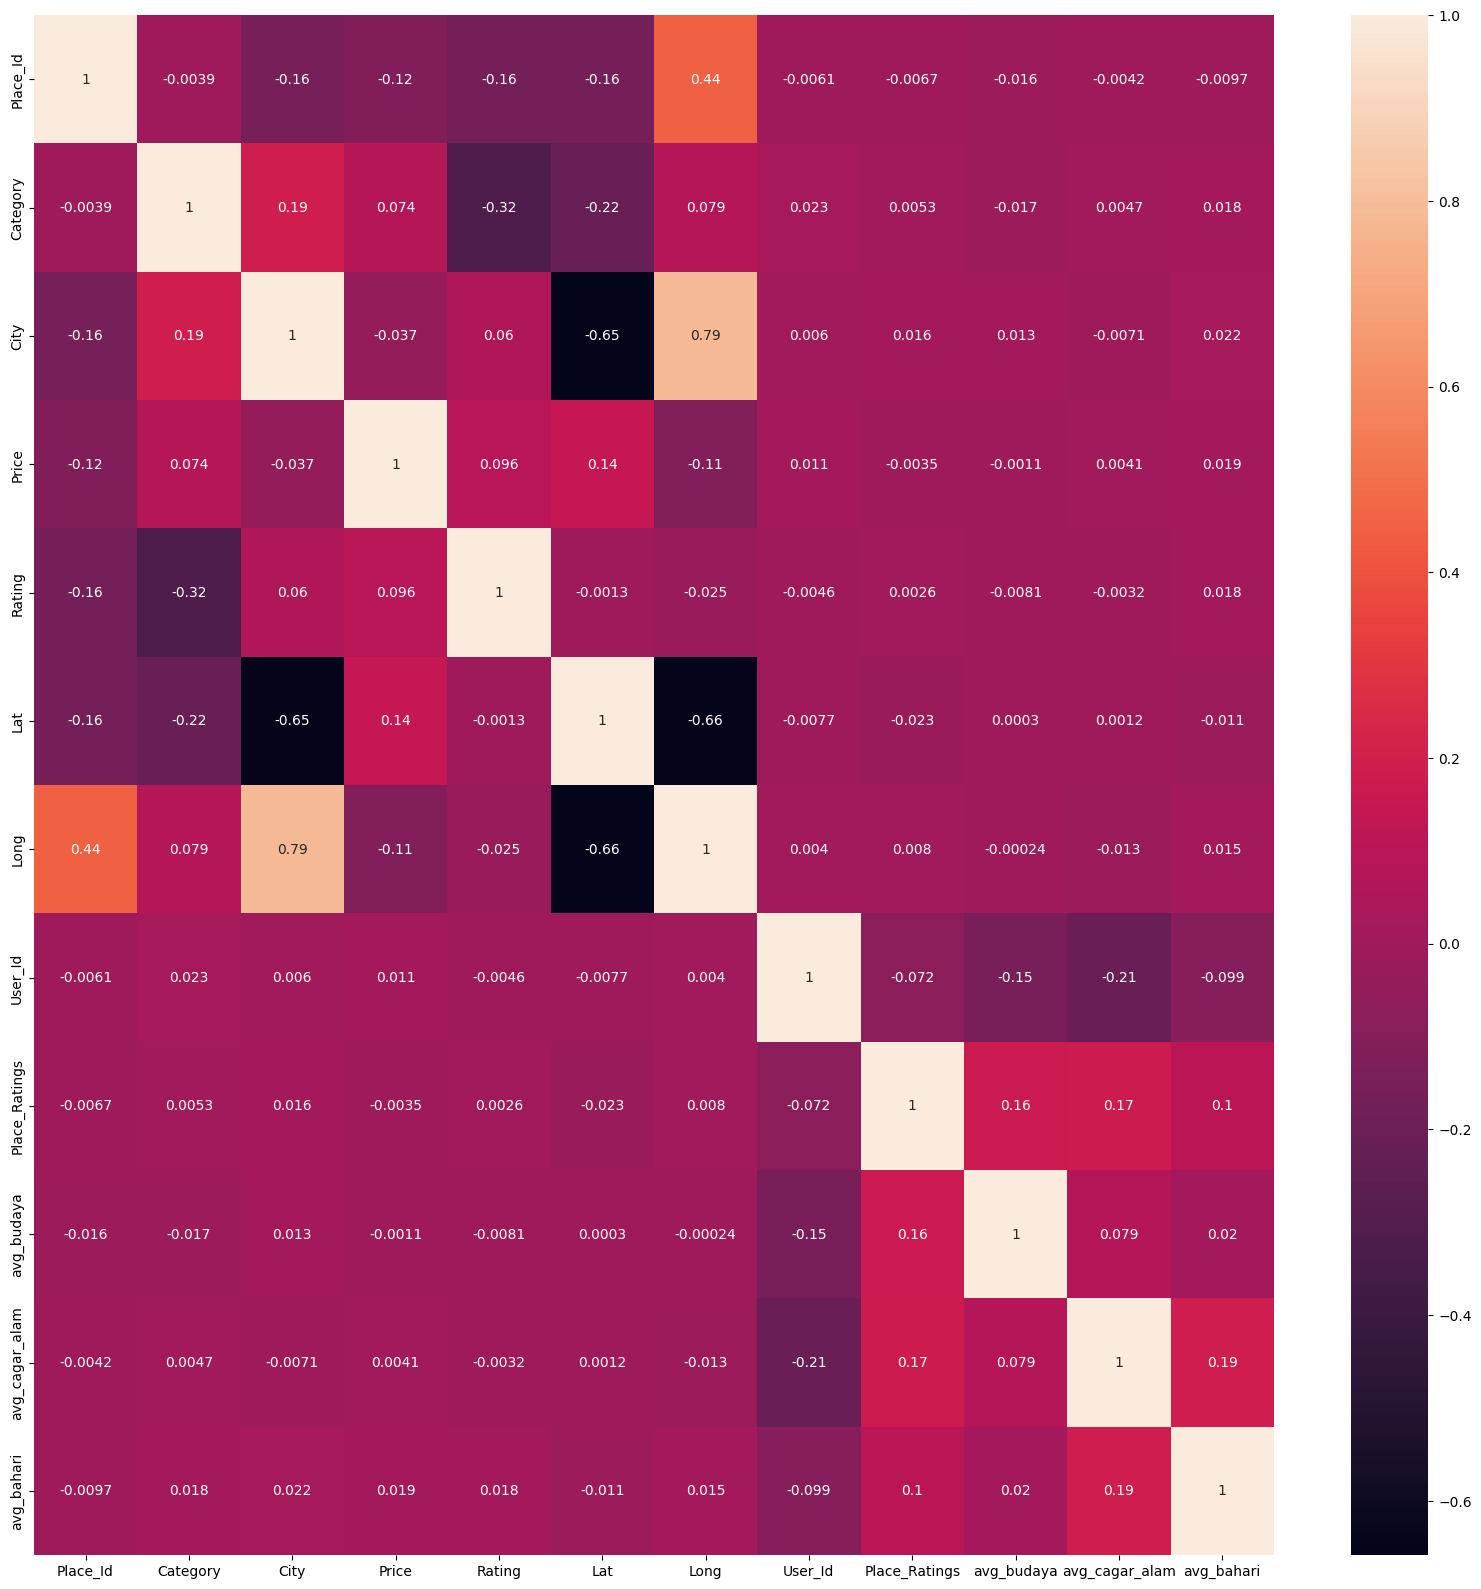

In [109]:
fig, ax = plt.subplots(figsize=(20,20))
correlation = correlation_dataset.corr()
sns.heatmap(correlation, annot=True, ax=ax)

## Menyiapkan training data

In [110]:
tourism_dataset = info_tourism.drop(['Place_Name', 'Description', 'Coordinate', 'City'], axis=1)

category_encoding = {'Budaya': 1, 'Cagar Alam': 2, 'Bahari': 3}
tourism_dataset['Category'] = tourism_dataset['Category'].map(category_encoding)

tourism_dataset = tourism_dataset.merge(tourism_rating)
tourism_dataset = tourism_dataset.sort_values(['User_Id', 'Place_Id'])
y_train = users_dataset['Place_Ratings'].to_numpy()

In [111]:
tourism_dataset

,Place_Id,Category,Price,Rating,Lat,Long,User_Id,Place_Ratings
243,20,1,2000,4.5,-6.172224,106.818969,1,4
262,21,1,5000,4.5,-6.134907,106.812445,1,2
408,41,1,2000,4.4,-6.126955,106.808590,1,5
499,48,1,5000,4.6,-6.189159,106.839774,1,2
780,67,2,25000,4.2,-6.116008,106.769202,1,4
...,...,...,...,...,...,...,...,...
4347,323,2,0,4.9,-6.601321,106.632734,300,1
4369,324,2,15000,4.2,-7.114788,107.438086,300,3
4653,343,3,3000,4.0,-6.945105,110.398240,300,4
4936,363,3,5000,3.4,-6.954569,110.360095,300,1


In [112]:
users_dataset

,User_Id,avg_budaya,avg_cagar_alam,avg_bahari,Place_Id,Place_Ratings
6,1,3.5,3.625,2.0,20,4
18,1,3.5,3.625,2.0,21,2
11,1,3.5,3.625,2.0,41,5
20,1,3.5,3.625,2.0,48,2
12,1,3.5,3.625,2.0,67,4
...,...,...,...,...,...,...
5918,300,3.5,2.800,3.0,323,1
5917,300,3.5,2.800,3.0,324,3
5913,300,3.5,2.800,3.0,343,4
5921,300,3.5,2.800,3.0,363,1


In [113]:
tourism_train = tourism_dataset[['Price', 'Rating', 'Lat', 'Long', 'Category']].to_numpy()
user_train = users_dataset[['avg_budaya', 'avg_cagar_alam', 'avg_bahari']].to_numpy()

In [114]:
scalerTourism = StandardScaler()
scalerTourism.fit(tourism_train)
tourism_train = scalerTourism.transform(tourism_train)

scalerUser = StandardScaler()
scalerUser.fit(user_train)
user_train = scalerUser.transform(user_train)

scalerTarget = MinMaxScaler((-1, 1))
scalerTarget.fit(y_train.reshape(-1, 1))
y_train = scalerTarget.transform(y_train.reshape(-1, 1))

In [115]:
# save scaler
joblib.dump(scalerTourism, 'scalerTourism.save')
joblib.dump(scalerUser, 'scalerUser.save')
joblib.dump(scalerTarget, 'scalerTarget.save')

['scalerTarget.save']

In [116]:
tourism_train, tourism_test = train_test_split(tourism_train, train_size=0.80, shuffle=True, random_state=1)
user_train, user_test = train_test_split(user_train, train_size=0.80, shuffle=True, random_state=1)
y_train, y_test       = train_test_split(y_train,    train_size=0.80, shuffle=True, random_state=1)
print(f"tourism training data shape: {tourism_train.shape}")
print(f"tourism test data shape: {tourism_test.shape}")
print(f"y training data shape: {y_train.shape}")

tourism training data shape: (4740, 5)
tourism test data shape: (1186, 5)
y training data shape: (4740, 1)


## Membuat NN

In [117]:
num_user_features = 3
num_tourism_features = 5
num_outputs = 32
tf.random.set_seed(1)
user_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_outputs),
])

tourism_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_outputs),
])

# create the user input and point to the base network
input_user = tf.keras.layers.Input(shape=(num_user_features,), batch_size=8)
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

# create the tourism input and point to the base network
input_tourism = tf.keras.layers.Input(shape=(num_tourism_features,), batch_size=8)
vm = tourism_NN(input_tourism)
vm = tf.linalg.l2_normalize(vm, axis=1)

# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])
# output = tf.keras.layers.Dense(16)(output)

# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_tourism], output)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(8, 3)]             0           []                               
                                                                                                  
 input_6 (InputLayer)           [(8, 5)]             0           []                               
                                                                                                  
 sequential_4 (Sequential)      (8, 32)              10848       ['input_5[0][0]']                
                                                                                                  
 sequential_5 (Sequential)      (8, 32)              38560       ['input_6[0][0]']                
                                                                                            

In [118]:
tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=opt,
              loss=cost_fn, metrics=['accuracy'])

In [119]:
tf.random.set_seed(1)
model.fit([user_train, tourism_train], y_train, epochs=40)

Epoch 1/40
149/149 [==============================] - 3s 4ms/step - loss: 0.4734 - accuracy: 0.2122
Epoch 2/40
149/149 [==============================] - 1s 4ms/step - loss: 0.4614 - accuracy: 0.2110
Epoch 3/40
149/149 [==============================] - 1s 4ms/step - loss: 0.4586 - accuracy: 0.2110
Epoch 4/40
149/149 [==============================] - 1s 4ms/step - loss: 0.4477 - accuracy: 0.2108
Epoch 5/40
149/149 [==============================] - 1s 4ms/step - loss: 0.4370 - accuracy: 0.2139
Epoch 6/40
149/149 [==============================] - 1s 4ms/step - loss: 0.4345 - accuracy: 0.2122
Epoch 7/40
149/149 [==============================] - 1s 4ms/step - loss: 0.4356 - accuracy: 0.2137
Epoch 8/40
149/149 [==============================] - 1s 4ms/step - loss: 0.4323 - accuracy: 0.2131
Epoch 9/40
149/149 [==============================] - 1s 4ms/step - loss: 0.4297 - accuracy: 0.2158
Epoch 10/40
149/149 [==============================] - 1s 4ms/step - loss: 0.4312 - accuracy: 0.2141

In [120]:
model.evaluate([user_test, tourism_test], y_test)

38/38 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.2209


[0.4340949058532715, 0.22091062366962433]

## Menguji model untuk user baru

In [121]:
# tourism_dataset_for_pred = info_tourism.drop(['Place_Name', 'Description', 'Coordinate'], axis=1)
tourism_features = info_tourism.drop(['Place_Name', 'Description', 'Coordinate', 'City'], axis=1)
category_encoding = {'Budaya': 1, 'Cagar Alam': 2, 'Bahari': 3}
tourism_features['Category'] = tourism_features['Category'].map(category_encoding)
tourism_features = tourism_features.reset_index(drop=True)
tourism_features

,Place_Id,Category,Price,Rating,Lat,Long
0,1,1,20000,4.6,-6.175392,106.827153
1,2,1,0,4.6,-6.137645,106.817125
2,7,2,4000,4.5,-6.312459,106.820187
3,9,3,175000,4.4,1.078880,103.931398
4,10,3,150000,4.5,-5.803205,106.523791
...,...,...,...,...,...,...
265,426,1,0,4.7,-7.259295,112.747051
266,427,1,0,4.3,-7.247284,112.801081
267,428,1,0,4.6,-7.267775,112.744390
268,429,1,0,4.6,-7.230817,112.734234


In [122]:
new_user_id = 301
new_avg_budaya = 5.0
new_avg_cagar_alam = 5.0
new_avg_bahari = 1

user_feature = np.array([[new_user_id, new_avg_budaya, 
                      new_avg_cagar_alam, new_avg_bahari
                      ]])

In [123]:
user_features = np.tile(user_feature, (len(tourism_features), 1))
user_features

array([[301.,   5.,   5.,   1.],
       [301.,   5.,   5.,   1.],
       [301.,   5.,   5.,   1.],
       ...,
       [301.,   5.,   5.,   1.],
       [301.,   5.,   5.,   1.],
       [301.,   5.,   5.,   1.]])

In [124]:
scalerTourism = joblib.load('scalerTourism.save')
scalerUser = joblib.load('scalerUser.save')
scalerTarget = joblib.load('scalerTarget.save')

tourism_columns = ['Price', 'Rating', 'Lat', 'Long', 'Category']

suser_features = scalerUser.transform(user_features[:, 1:])
stourism_features = scalerTourism.transform(tourism_features[tourism_columns].to_numpy())

y_pred = model.predict([suser_features, stourism_features])

9/9 [==============================] - 0s 2ms/step


In [125]:
# unscale y prediction 
y_pred = scalerTarget.inverse_transform(y_pred)

# sort the results, highest prediction first
sorted_index = np.argsort(-y_pred,axis=0).reshape(-1).tolist()  #negate to get largest rating first
sorted_ypred   = y_pred[sorted_index]
sorted_tourisms = tourism_features.loc[sorted_index]  #using unscaled vectors for display

In [126]:
sorted_tourisms = sorted_tourisms[['Place_Id', 'Price', 'Rating', 'Lat', 'Long', 'Category']]

category_decoding = {1: 'Budaya', 2: 'Cagar Alam', 3: 'Bahari'}
sorted_tourisms['Category'] = sorted_tourisms['Category'].map(category_decoding)

sorted_tourisms.loc[1, 'Place_Ratings_Prediction'] = 0
sorted_tourisms.isetitem(-1, sorted_ypred)

sorted_tourisms[:10]

,Place_Id,Price,Rating,Lat,Long,Category,Place_Ratings_Prediction
143,234,75000,4.5,-6.851659,107.595553,Budaya,4.687407
157,262,50000,4.7,-6.859701,107.636098,Cagar Alam,4.663152
200,325,75000,4.7,-6.897136,107.655847,Budaya,4.657564
231,372,2000,4.8,-7.255236,110.399190,Cagar Alam,4.601933
247,393,0,4.4,-7.295221,112.803560,Cagar Alam,4.558169
250,406,0,4.4,-7.312366,112.788902,Cagar Alam,4.557274
70,139,10000,4.7,-7.841253,110.543056,Cagar Alam,4.516172
64,124,0,5.0,-7.801035,110.375192,Budaya,4.485427
204,330,40000,4.4,-6.922082,107.607318,Budaya,4.472874
227,368,3000,4.5,-7.267539,110.418076,Cagar Alam,4.471293


## Menguji model untuk existing user

In [127]:
def pred_existing_user(user_id):
  scalerTourism = joblib.load('scalerTourism.save')
  scalerUser = joblib.load('scalerUser.save')
  scalerTarget = joblib.load('scalerTarget.save')

  tourism_user_dataset = tourism_dataset.loc[tourism_dataset['User_Id'] == user_id]
  user_dataset = users_dataset.loc[users_dataset['User_Id'] == user_id]

  user_features = scalerUser.transform(user_dataset.to_numpy()[:, 1:-2])
  tourism_features = scalerTourism.transform(tourism_user_dataset.to_numpy()[:, 1:-2])

  y_pred = model.predict([user_features, tourism_features])
  y_pred = scalerTarget.inverse_transform(y_pred)

  result = user_dataset.merge(tourism_user_dataset)
  result.loc[1, 'Place_Ratings_Prediction'] = 0
  result.isetitem(-1, y_pred)

  cols = ['Place_Id', 'Price', 'Rating', 'Lat', 'Long', 'Category', 'User_Id', 
          'avg_bahari', 'avg_budaya', 'avg_cagar_alam', 'Rating', 
          'Place_Ratings', 'Place_Ratings_Prediction']

  result = result[cols]

  category_decoding = {1: 'Budaya', 2: 'Cagar Alam', 3: 'Bahari'}
  result['Category'] = result['Category'].map(category_decoding)
  return result

In [128]:
pred_existing_user(1)

1/1 [==============================] - 0s 20ms/step


,Place_Id,Price,Rating,Lat,Long,Category,User_Id,avg_bahari,avg_budaya,avg_cagar_alam,Rating,Place_Ratings,Place_Ratings_Prediction
0,20,2000,4.5,-6.172224,106.818969,Budaya,1,2.0,3.5,3.625,4.5,4,3.996430
1,21,5000,4.5,-6.134907,106.812445,Budaya,1,2.0,3.5,3.625,4.5,2,3.996514
2,41,2000,4.4,-6.126955,106.808590,Budaya,1,2.0,3.5,3.625,4.4,5,3.996429
3,48,5000,4.6,-6.189159,106.839774,Budaya,1,2.0,3.5,3.625,4.6,2,3.996515
4,67,25000,4.2,-6.116008,106.769202,Cagar Alam,1,2.0,3.5,3.625,4.2,4,3.996611
5,89,50000,4.4,-7.816316,110.387144,Budaya,1,2.0,3.5,3.625,4.4,3,3.996622
6,101,0,4.0,-7.792190,110.362151,Budaya,1,2.0,3.5,3.625,4.0,4,1.839407
7,154,10000,4.5,-8.133339,110.553741,Bahari,1,2.0,3.5,3.625,4.5,2,3.996571
8,179,75000,4.6,-7.770542,110.489416,Budaya,1,2.0,3.5,3.625,4.6,3,3.996626
9,208,10000,4.6,-7.762814,110.116163,Cagar Alam,1,2.0,3.5,3.625,4.6,5,3.996571


In [129]:
pred_existing_user(200)

1/1 [==============================] - 0s 21ms/step


,Place_Id,Price,Rating,Lat,Long,Category,User_Id,avg_bahari,avg_budaya,avg_cagar_alam,Rating,Place_Ratings,Place_Ratings_Prediction
0,39,100000,4.5,-6.190942,106.767622,Budaya,200,2.0,2.9,3.1,4.5,4,2.976257
1,166,6000,4.5,-7.647054,110.141470,Cagar Alam,200,2.0,2.9,3.1,4.5,5,2.975738
2,167,0,4.5,-7.974294,110.436436,Cagar Alam,200,2.0,2.9,3.1,4.5,4,2.115709
3,170,50000,4.7,-7.607874,110.203751,Budaya,200,2.0,2.9,3.1,4.7,2,2.976223
4,184,10000,4.4,-8.136666,110.565996,Bahari,200,2.0,2.9,3.1,4.4,2,2.975957
5,191,10000,4.5,-8.138451,110.577522,Bahari,200,2.0,2.9,3.1,4.5,1,2.975958
6,199,5000,4.5,-8.197894,110.720854,Bahari,200,2.0,2.9,3.1,4.5,3,2.975623
7,243,15000,4.1,-6.915455,107.640769,Budaya,200,2.0,2.9,3.1,4.1,4,2.976073
8,258,5000,4.6,-6.902638,107.619169,Budaya,200,2.0,2.9,3.1,4.6,5,2.975642
9,259,0,4.5,-6.893433,107.618551,Budaya,200,2.0,2.9,3.1,4.5,5,2.115276


# Save Model

In [130]:
import tensorflow as tf

# Save the model in H5 format
model.save('model.h5')